In [2]:
import pandas as pd
import numpy as np

import matplotlib as m_plt
from matplotlib import pyplot as plt
import matplotlib.mlab as mlabQ

import seaborn as sns

from copy import copy
from pprint import pprint

import sys
import os

import personal_plotter as p_plt

In [3]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Agro Data

## 1. Data

***This case it's a temporal, thus , doesnt have hypotesis*** 

In [4]:
#/agro/data_dict.xlsx
try :
    agro_dataset = pd.read_csv("./agro/falhas_plantio_hashing_utf8.csv", sep=';', encoding='utf-8')
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(agro_dataset.shape[0], agro_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	6302	|	Columns	:	212


### 1.1 - Data Labels

In [5]:
agro_dataset_descriptions = pd.read_excel("./agro/data_dict.xlsx")

agro_dataset_descriptions

,Campos,Descrição
0,CD_SAFRA,Safra na qual se realizou o plantio
1,Area_Plantio,Área de Plantio
2,Perc_Falha,Porcentagem de Falhas no plantio
3,Perc_Infest_Inv,Porcentagem de infestação de pragas
4,Ciclo,Ciclo de plantio
5,CD_TP_SOLO,Tipo de solo
6,CD_CLAS_DECL,Declividade
7,CD_CLAS_FERT,Tipo de Fertilizante
8,CD_TEXT_SOLO,Textura do solo
9,CD_TOPOG,Topologia


### 1.2.- Viewing Data

In [6]:
agro_dataset = agro_dataset.iloc[:, 1:]

In [7]:
agro_dataset.iloc[10:15, :]

,Fazenda,Zona,Talhao,Nome_Estacao_SM1,INSTANCIA1,CD_EMPRESA1,Tipo_prop1,CD_SAFRA,Area_Plantio,Perc_Falha,...,EPT_mm_December,EPT_mm_February,EPT_mm_January,EPT_mm_July,EPT_mm_June,EPT_mm_March,EPT_mm_May,EPT_mm_November,EPT_mm_October,EPT_mm_September
10,647052da17e3340e599d54abde4858a7,4d4c1ad2286f1a7670a024467dd10808,71db8a6cad03244e6e50f0ad8bc95a65,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,0.64,0.036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,647052da17e3340e599d54abde4858a7,4d4c1ad2286f1a7670a024467dd10808,8f3571abef23f6aca0f7b8666a74e7e0,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,0.80,0.0465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,647052da17e3340e599d54abde4858a7,4d4c1ad2286f1a7670a024467dd10808,fa5a4df7ac0f9782037da890557fd8b8,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,5.37,0.0689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,647052da17e3340e599d54abde4858a7,4d4c1ad2286f1a7670a024467dd10808,8ae1ac7bdf62dca7c19b427a9153445c,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,5.52,0.0589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,647052da17e3340e599d54abde4858a7,4d4c1ad2286f1a7670a024467dd10808,06cd248dd1409b804444bd9ad5533d1d,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,2.60,0.0843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.- NA & NULL Exploration


> 	 max amount of NA/NULL per column =	5151
> 	 ratio (Max/Rows) =	0.8174

> 	 ^ % Max NA/NULL =	81.7360
# 	 v Column =	CD_EST_POST_BIS

> 	 ^ % Min NA/NULL =	0.0000
# 	 v Column =	Fazenda

> 	 Mean NA/NULL =	1181.6919
> 	 ^ % Mean NA/NULL =	18.7511

> 	 Number of coloumns with NA/NULL =	200
> 	 Total of Columns =	211
> 	 ^ % Amount NA/NULL =	94.7867 



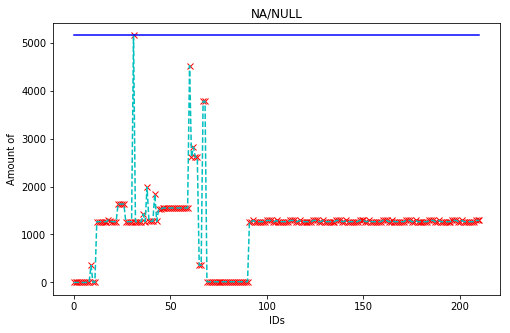


> 	 max amount of not NA/NULL per column =	6302
> 	 ratio (Max/Rows) =	1.0000

> 	 ^ % Max not NA/NULL =	100.0000
# 	 v Column =	Fazenda

> 	 ^ % Min not NA/NULL =	18.2640
# 	 v Column =	CD_EST_POST_BIS

> 	 Mean not NA/NULL =	5120.3081
> 	 ^ % Mean not NA/NULL =	81.2489

> 	 Number of coloumns without NA/NULL =	211
> 	 Total of Columns =	211
> 	 ^ % Amount of Not NA/NULL =	100.0000 



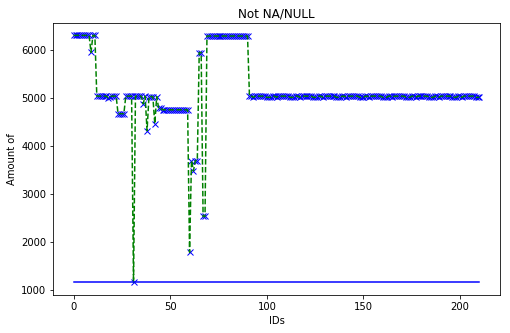

In [8]:
temp_ids = np.arange(agro_dataset.columns.size)
temp_max_amount = agro_dataset.shape[0]


##### NA/NULL

plt.figure(figsize=(8,5))
temp_vals = agro_dataset.isna().astype(int).sum()

plt.plot(temp_ids, temp_vals, "rx")
plt.plot(temp_ids, temp_vals, "c--")

plt.plot(temp_ids, temp_vals.max() * np.ones(temp_ids.size), "b-")

plt.title("NA/NULL")
plt.xlabel("IDs")
plt.ylabel("Amount of")

print(
"""
> \t max amount of NA/NULL per column =\t{:d}
> \t ratio (Max/Rows) =\t{:3.4f}

> \t ^ % Max NA/NULL =\t{:3.4f}
# \t v Column =\t{:s}

> \t ^ % Min NA/NULL =\t{:3.4f}
# \t v Column =\t{:s}

> \t Mean NA/NULL =\t{:3.4f}
> \t ^ % Mean NA/NULL =\t{:3.4f}

> \t Number of coloumns with NA/NULL =\t{:d}
> \t Total of Columns =\t{:d}
> \t ^ % Amount NA/NULL =\t{:3.4f} 
""".format( temp_vals.max(),
            temp_vals.max() / temp_max_amount,
            (temp_vals.max() / temp_max_amount) * 100, 
            temp_vals.idxmax(), 
            (temp_vals.min() / temp_max_amount) * 100, 
            temp_vals.idxmin(), 
            temp_vals.mean(), 
            (temp_vals.mean() / temp_max_amount) * 100,
            (temp_vals > 0).astype(int).sum(),
            temp_vals.size,
            ((temp_vals > 0).astype(int).sum() / temp_vals.size) * 100
          )
)

plt.show()
      
      
##### NOT NA/NULL

plt.figure(figsize=(8,5))
temp_vals = agro_dataset.notna().astype(int).sum()

plt.plot(temp_ids, temp_vals, 'bx')
plt.plot(temp_ids, temp_vals, 'g--')

plt.plot(temp_ids, temp_vals.min() * np.ones(temp_ids.size), "b-")

plt.title("Not NA/NULL")
plt.xlabel("IDs")
plt.ylabel("Amount of")

print(
"""
> \t max amount of not NA/NULL per column =\t{:d}
> \t ratio (Max/Rows) =\t{:3.4f}

> \t ^ % Max not NA/NULL =\t{:3.4f}
# \t v Column =\t{:s}

> \t ^ % Min not NA/NULL =\t{:3.4f}
# \t v Column =\t{:s}

> \t Mean not NA/NULL =\t{:3.4f}
> \t ^ % Mean not NA/NULL =\t{:3.4f}

> \t Number of coloumns without NA/NULL =\t{:d}
> \t Total of Columns =\t{:d}
> \t ^ % Amount of Not NA/NULL =\t{:3.4f} 
""".format( temp_vals.max(),
            temp_vals.max() / temp_max_amount,
            (temp_vals.max() / temp_max_amount) * 100, 
            temp_vals.idxmax(), 
            (temp_vals.min() / temp_max_amount) * 100, 
            temp_vals.idxmin(), 
            temp_vals.mean(), 
            (temp_vals.mean() / temp_max_amount) * 100,
            (temp_vals != 0).astype(int).sum(),
            temp_vals.size,
            ((temp_vals != 0).astype(int).sum() / temp_vals.size) * 100
          )
)


plt.show()

### 2.1- Observation

* Every column has data
* At least 1 column doesnt have NA/NULL values.

In [9]:
agro_dataset.describe(include='all')

,Fazenda,Zona,Talhao,Nome_Estacao_SM1,INSTANCIA1,CD_EMPRESA1,Tipo_prop1,CD_SAFRA,Area_Plantio,Perc_Falha,...,EPT_mm_December,EPT_mm_February,EPT_mm_January,EPT_mm_July,EPT_mm_June,EPT_mm_March,EPT_mm_May,EPT_mm_November,EPT_mm_October,EPT_mm_September
count,6302,6302,6302,6302,6302,6302,6302,6302.000000,6302.000000,5948,...,5010.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5010.000000,5010.000000,5010.000000
unique,561,362,105,13,20,20,6,NaN,NaN,1674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,b7003eda5916045f6d0d71829fc04846,4b5630ee914e848e8d07221556b0a2fb,4b5630ee914e848e8d07221556b0a2fb,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c01f179e4b57ab8bd9de309e6d576c48,NaN,NaN,"1,00E-04",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,134,631,513,1267,1267,1267,4292,NaN,NaN,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21679.247540,9.783290,NaN,...,135.668984,119.608214,125.427019,88.464804,66.143293,129.955104,74.811178,133.527788,137.175465,143.946898
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.118511,13.124769,NaN,...,13.664263,12.724072,10.893325,15.738755,12.307184,9.117529,9.991296,13.464673,14.613832,20.122447
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21617.000000,0.020000,NaN,...,109.300000,101.230000,106.730000,54.800000,49.000000,106.700000,59.400000,114.900000,110.600000,105.600000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21617.000000,3.120000,NaN,...,125.900000,109.950000,116.000000,76.900000,58.500000,124.000000,65.800000,123.900000,127.300000,135.610000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21718.000000,6.420000,NaN,...,134.600000,111.060000,123.400000,86.300000,59.900000,127.400000,70.860000,127.200000,135.300000,142.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21718.000000,12.462500,NaN,...,148.300000,128.950000,133.530000,98.800000,73.900000,139.500000,85.400000,146.400000,142.900000,164.000000


ValueError: x and y must have same first dimension, but have shapes (1,) and (200, 1)

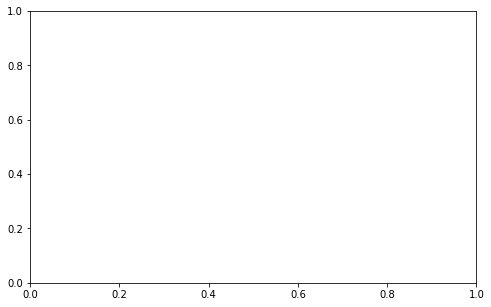

In [36]:
temp_vals = agro_dataset.isna().astype(int).sum()

def ind_sel(x):
    ind = []
    ii = 0
    for cond in x:
        if cond:
            ind.append(ii)
        ii += 1
    return ind



##### NA/NULL

plt.figure(figsize=(8,5))

temp_vals = agro_dataset.isna().astype(int).sum()
temp_vals = pd.DataFrame(temp_vals[ind_sel(temp_vals != 0)])

temp_ids = np.arange(temp_vals.columns.size)
temp_max_amount = agro_dataset.shape[0]

plt.plot(temp_ids, temp_vals, "rx")
plt.plot(temp_ids, temp_vals, "c--")

plt.plot(temp_ids, temp_vals.max() * np.ones(temp_ids.size), "b-")

plt.title("NA/NULL")
plt.xlabel("IDs")
plt.ylabel("Amount of")

print(
"""
> \t max amount of NA/NULL per column =\t{:d}
> \t ratio (Max/Rows) =\t{:3.4f}

> \t ^ % Max NA/NULL =\t{:3.4f}
# \t v Column =\t{:s}

> \t ^ % Min NA/NULL =\t{:3.4f}
# \t v Column =\t{:s}

> \t Mean NA/NULL =\t{:3.4f}
> \t ^ % Mean NA/NULL =\t{:3.4f}

> \t Number of coloumns with NA/NULL =\t{:d}
> \t Total of Columns =\t{:d}
> \t ^ % Amount NA/NULL =\t{:3.4f} 
""".format( temp_vals.max(),
            temp_vals.max() / temp_max_amount,
            (temp_vals.max() / temp_max_amount) * 100, 
            temp_vals.idxmax(), 
            (temp_vals.min() / temp_max_amount) * 100, 
            temp_vals.idxmin(), 
            temp_vals.mean(), 
            (temp_vals.mean() / temp_max_amount) * 100,
            (temp_vals > 0).astype(int).sum(),
            temp_vals.size,
            ((temp_vals > 0).astype(int).sum() / temp_vals.size) * 100
          )
)

plt.show()


## 3.- Pre-Processing